<a href="https://colab.research.google.com/github/pajonnakuti/pyDataviz/blob/main/code/XArray_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is Xarray?**

Xarray is a Python library designed to handle multi-dimensional labeled arrays, offering a streamlined way to work with data that extends beyond the capabilities of Numpy and Pandas.

**Key Features**

1.   Labeled dimensions and coordinates
2.   Efficient groupby, resampling, and aggregation operations
3. Compatibility with popular scientific Python libraries like Pandas and Numpy

**Xarray fundamentals: DataAarray & Dataset**

**DataArray**

The basic building block of Xarray, similar to Numpy arrays but with labels for dimensions, coordinates, and attributes.

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd

data = np.random.randn(10)
time = pd.date_range("2023-01-01", periods=10)
data_array = xr.DataArray(data, coords=[time], dims=["time"])
print(data_array)

<xarray.DataArray (time: 10)> Size: 80B
array([ 1.07267555, -0.45365255, -0.37542844,  2.33032565,  1.02176868,
       -0.05916166, -1.97893327,  1.76456017, -0.55072168, -0.41354016])
Coordinates:
  * time     (time) datetime64[ns] 80B 2023-01-01 2023-01-02 ... 2023-01-10


**Dataset**

A dictionary-like container that maps variable names to DataArrays, ideal for working with multiple variables.

In [ ]:
ds = xr.Dataset({
    "air": data_array,
    "temperature": xr.DataArray(np.random.randn(10), dims=["time"], coords={"time": time})
})

# Add latitude and longitude coordinates
lat = np.arange(10, 20)  # Example latitude values
lon = np.arange(80, 90)  # Example longitude values
ds = ds.assign_coords(lat=('time', lat), lon=('time', lon))

print(ds)

<xarray.Dataset> Size: 400B
Dimensions:      (time: 10)
Coordinates:
  * time         (time) datetime64[ns] 80B 2023-01-01 2023-01-02 ... 2023-01-10
    lat          (time) int64 80B 10 11 12 13 14 15 16 17 18 19
    lon          (time) int64 80B 80 81 82 83 84 85 86 87 88 89
Data variables:
    air          (time) float64 80B 1.073 -0.4537 -0.3754 ... -0.5507 -0.4135
    temperature  (time) float64 80B 0.3819 -0.822 0.1059 ... 0.6607 0.5422


In [ ]:
# Attributes
ds.attrs = {"source": "weather dataset", "description": "temperature data"}
print(ds.attrs)

{'source': 'weather dataset', 'description': 'temperature data'}


**Indexing and Selecting Data**

In [ ]:
#Label-based indexing with .sel

ds.sel(time="2023-01-01")
ds.sel(time=slice("2023-01-01", "2023-01-05"))

<xarray.Dataset> Size: 200B
Dimensions:      (time: 5)
Coordinates:
  * time         (time) datetime64[ns] 40B 2023-01-01 2023-01-02 ... 2023-01-05
    lat          (time) int64 40B 10 11 12 13 14
    lon          (time) int64 40B 80 81 82 83 84
Data variables:
    air          (time) float64 40B 1.073 -0.4537 -0.3754 2.33 1.022
    temperature  (time) float64 40B 0.3819 -0.822 0.1059 -1.571 -0.781
Attributes:
    source:       weather dataset
    description:  temperature data

In [ ]:
#Position-based indexing with .isel
ds.isel(time=0)

<xarray.Dataset> Size: 40B
Dimensions:      ()
Coordinates:
    time         datetime64[ns] 8B 2023-01-01
    lat          int64 8B 10
    lon          int64 8B 80
Data variables:
    air          float64 8B 1.073
    temperature  float64 8B 0.3819
Attributes:
    source:       weather dataset
    description:  temperature data

In [ ]:
#Boolean Indexing & Masking:
ds.temperature.where(ds.temperature > 0, drop=True)

<xarray.DataArray 'temperature' (time: 6)> Size: 48B
array([0.38192116, 0.10590651, 0.66007927, 0.23962604, 0.6606777 ,
       0.54218261])
Coordinates:
  * time     (time) datetime64[ns] 48B 2023-01-01 2023-01-03 ... 2023-01-10
    lat      (time) int64 48B 10 12 16 17 18 19
    lon      (time) int64 48B 80 82 86 87 88 89

In [ ]:
#Nearest Neighbor Lookup: With tolerance to limit the distance of inexact lookups
ds.sel(lat=17, lon=87, method="nearest", tolerance=0.1)

KeyError: "no index found for coordinate 'lat'"

In [ ]:
#Dimensions (.dims): Dimensions correspond to the axes of your data

ds.temperature.dims  # ('time', 'lat', 'lon')

('time',)

In [ ]:
#Coordinates (.coords): Coordinates map dimension names to values

ds.coords

Coordinates:
  * time     (time) datetime64[ns] 80B 2023-01-01 2023-01-02 ... 2023-01-10
    lat      (time) int64 80B 10 11 12 13 14 15 16 17 18 19
    lon      (time) int64 80B 80 81 82 83 84 85 86 87 88 89

In [ ]:
#Reduction: Aggregation operations that reduce the dimensions of the dataset

ds.temperature.mean(dim="time")

<xarray.DataArray 'temperature' ()> Size: 8B
array(-0.13408245)

In [ ]:
#Groupby Operations: Xarray enables split-apply-combine workflows

ds.groupby("time.month").mean()

<xarray.Dataset> Size: 24B
Dimensions:      (month: 1)
Coordinates:
  * month        (month) int64 8B 1
Data variables:
    air          (month) float64 8B 0.2358
    temperature  (month) float64 8B -0.1341
Attributes:
    source:       weather dataset
    description:  temperature data

In [ ]:
ds.resample(time="M").mean()

/usr/local/lib/python3.12/dist-packages/xarray/groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


<xarray.Dataset> Size: 24B
Dimensions:      (time: 1)
Coordinates:
  * time         (time) datetime64[ns] 8B 2023-01-31
Data variables:
    air          (time) float64 8B 0.2358
    temperature  (time) float64 8B -0.1341
Attributes:
    source:       weather dataset
    description:  temperature data

In [ ]:
ds.rolling(time=3).mean()

<xarray.Dataset> Size: 400B
Dimensions:      (time: 10)
Coordinates:
  * time         (time) datetime64[ns] 80B 2023-01-01 2023-01-02 ... 2023-01-10
    lat          (time) int64 80B 10 11 12 13 14 15 16 17 18 19
    lon          (time) int64 80B 80 81 82 83 84 85 86 87 88 89
Data variables:
    air          (time) float64 80B nan nan 0.0812 ... -0.09118 -0.255 0.2668
    temperature  (time) float64 80B nan nan -0.1114 ... 0.04761 0.5201 0.4808
Attributes:
    source:       weather dataset
    description:  temperature data

In [ ]:
#Broadcasting: Xarray can automatically broadcast arrays with different shapes before applying operations

ds.temperature + ds.air

<xarray.DataArray (time: 10)> Size: 80B
array([ 1.45459671, -1.27561993, -0.26952193,  0.75895446,  0.24077592,
       -0.81604815, -1.318854  ,  2.00418621,  0.10995602,  0.12864245])
Coordinates:
  * time     (time) datetime64[ns] 80B 2023-01-01 2023-01-02 ... 2023-01-10
    lat      (time) int64 80B 10 11 12 13 14 15 16 17 18 19
    lon      (time) int64 80B 80 81 82 83 84 85 86 87 88 89

In [ ]:
#Apply Ufunc: Apply a Numpy function to an Xarray object while preserving its coordinates

xr.apply_ufunc(np.nan_to_num, ds.temperature, kwargs={"nan": 0})

<xarray.DataArray 'temperature' (time: 10)> Size: 80B
array([ 0.38192116, -0.82196738,  0.10590651, -1.57137119, -0.78099275,
       -0.75688648,  0.66007927,  0.23962604,  0.6606777 ,  0.54218261])
Coordinates:
  * time     (time) datetime64[ns] 80B 2023-01-01 2023-01-02 ... 2023-01-10
    lat      (time) int64 80B 10 11 12 13 14 15 16 17 18 19
    lon      (time) int64 80B 80 81 82 83 84 85 86 87 88 89

In [ ]:
#Saving Datasets: You can save a dataset or DataArray to a file

ds.to_netcdf("my_data.nc")

In [ ]:
#Loading Data: Load the dataset or DataArray
xr.open_dataset("my_data.nc")

<xarray.Dataset> Size: 400B
Dimensions:      (time: 10)
Coordinates:
  * time         (time) datetime64[ns] 80B 2023-01-01 2023-01-02 ... 2023-01-10
    lat          (time) int64 80B ...
    lon          (time) int64 80B ...
Data variables:
    air          (time) float64 80B ...
    temperature  (time) float64 80B ...
Attributes:
    source:       weather dataset
    description:  temperature data

In [1]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 39.5 MB/s eta 0:00:00


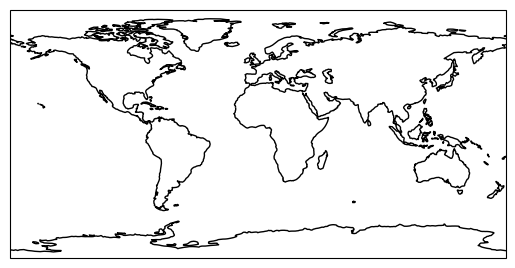

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

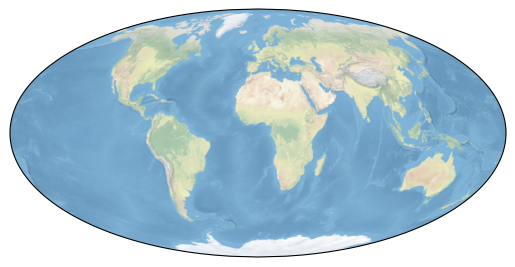

In [5]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

**Adding sample Data to the map**

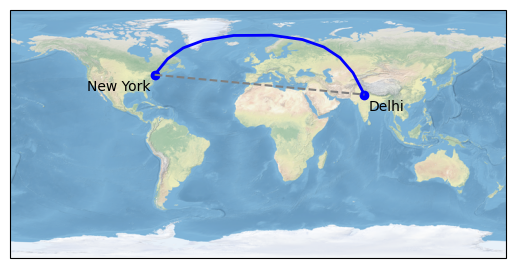

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()